**Random Forest -Advanced Model/ Updated**

**Model needs to be updated on insights!**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r'C:\Users\Malaika\Documents\resized_data2.csv')
df.head(5)

,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,...,IUCR_5094,IUCR_5110,IUCR_5111,IUCR_5112,IUCR_5113,IUCR_5114,IUCR_5121,IUCR_5130,IUCR_5131,IUCR_5132
0,0,0,0.550457,0.542373,1.025482,-0.582108,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1.260365,1.266538,1.822943,1.844403,0.807598,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1.131685,1.121705,1.532957,-1.468719,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-0.027879,-0.036959,0.083027,-0.535445,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,-0.314156,-0.326625,-1.439399,1.097784,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(df.shape)
print(len(df))
df.info()


(86537, 543)
86537
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Columns: 543 entries, Arrest to IUCR_5132
dtypes: float64(5), int64(538)
memory usage: 358.5 MB


2. We sampled at 5k and 10K first because we assume that

* Training on the large dataset takes too long, so smaller slices let us iterate quickly.

* Comparing performance across samples shows when adding more data stops giving meaningful accuracy gains.

* This helps us pick a good spot where the model is both fast to train and good enough.

3. On all our models, our target varable will be set to 'Arrest' and the rest of the columns will be set as X

In [4]:
df1 = df.sample(n=5000, random_state=42)

#  Define features & target
X = df1.drop(columns='Arrest')
y = df1['Arrest']


#  Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Fit the Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

# Predict & compute metrics
y_pred = rf_clf.predict(X_test)

accuracy_1  = accuracy_score(y_test, y_pred)
precision_1 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_1    = recall_score(   y_test, y_pred, average='macro', zero_division=0)
f1_1       = f1_score(       y_test, y_pred, average='macro', zero_division=0)
#average='macro':computes the metric separately for each class, simple avg so every class counts equally, even if some are rare.
#zero_division=0: it just returns 0 instead of crashing or returning “nan.”


print("Sample 1 Metrics:")
print(f"  Accuracy : {accuracy_1:.4f}")
print(f"  Precision: {precision_1:.4f}")
print(f"  Recall   : {recall_1:.4f}")
print(f"  F1 Score : {f1_1:.4f}")


Sample 1 Metrics:
  Accuracy : 0.8640
  Precision: 0.8399
  Recall   : 0.7965
  F1 Score : 0.8141


In [5]:
df2 = df.sample(n=10000, random_state=42)

# Define features & target
X = df2.drop(columns='Arrest')
y = df2['Arrest']


# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

# Predict & compute metrics
y_pred = rf_clf.predict(X_test)

accuracy_2  = accuracy_score(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_2    = recall_score(   y_test, y_pred, average='macro', zero_division=0)
f1_2        = f1_score(       y_test, y_pred, average='macro', zero_division=0)

print("Sample 2 Metrics:")
print(f"  Accuracy : {accuracy_2:.4f}")
print(f"  Precision: {precision_2:.4f}")
print(f"  Recall   : {recall_2:.4f}")
print(f"  F1 Score : {f1_2:.4f}")


Sample 2 Metrics:
  Accuracy : 0.8700
  Precision: 0.8418
  Recall   : 0.8077
  F1 Score : 0.8223


In [6]:
X = df.drop(columns='Arrest')
y = df['Arrest']


#  Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit the Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

#  Predict & compute metrics
y_pred = rf_clf.predict(X_test)

accuracy_rf  = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_rf    = recall_score(   y_test, y_pred, average='macro', zero_division=0)
f1_rf        = f1_score(       y_test, y_pred, average='macro', zero_division=0)

print(" Original Metrics:")
print(f"  Accuracy : {accuracy_rf:.4f}")
print(f"  Precision: {precision_rf:.4f}")
print(f"  Recall   : {recall_rf:.4f}")
print(f"  F1 Score : {f1_rf:.4f}")



 Original Metrics:
  Accuracy : 0.8661
  Precision: 0.8396
  Recall   : 0.8009
  F1 Score : 0.8171


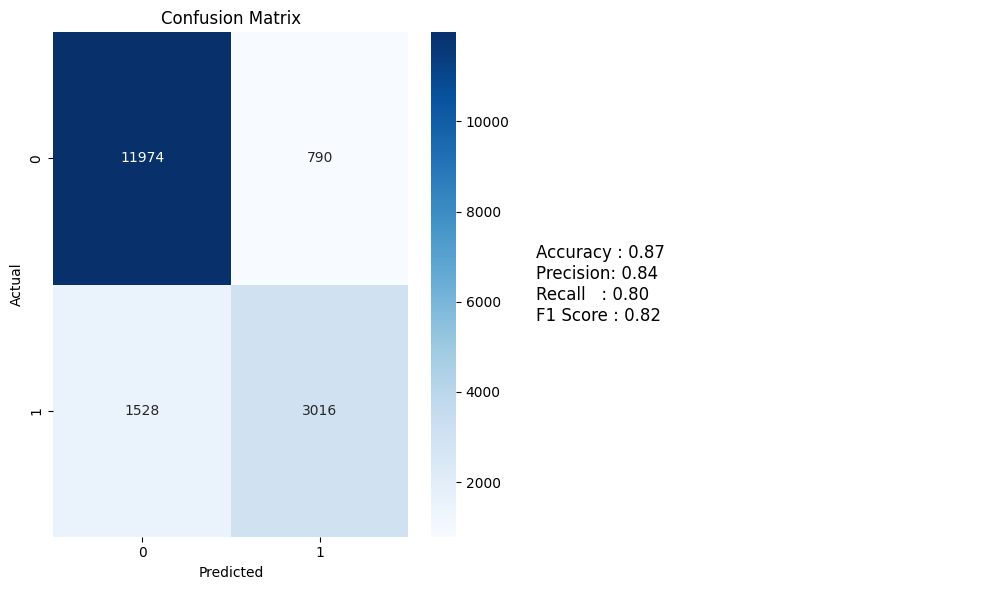

In [7]:
#  Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


metrics_text = (
    f"Accuracy : {accuracy_rf:.2f}\n"
    f"Precision: {precision_rf:.2f}\n"
    f"Recall   : {recall_rf:.2f}\n"
    f"F1 Score : {f1_rf:.2f}"
)

# Plot side-by-side
fig = plt.figure(figsize=(10, 6))
# left: confusion matrix
ax_cm = fig.add_subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", ax=ax_cm, cmap="Blues")
ax_cm.set_title("Confusion Matrix")
ax_cm.set_xlabel("Predicted")
ax_cm.set_ylabel("Actual")

# right: metrics
ax_txt = fig.add_subplot(1, 2, 2)
ax_txt.axis("off")
ax_txt.text(0, 0.5, metrics_text, fontsize=12, va="center")

plt.tight_layout()
plt.show()



In [8]:

# accuracy_1, precision_1, recall_1, f1_1 for 5,000 rows
# accuracy_2, precision_2, recall_2, f1_2 for 10,000 rows
# accuracy_rf, precision_rf, recall_rf, f1_rf for full dataset

results = [
    {
        'Sample Size': '5,000',
        'Accuracy':    accuracy_1,
        'Precision':   precision_1,
        'Recall':      recall_1,
        'F1 Score':    f1_1},

    {
        'Sample Size': '10,000',
        'Accuracy':    accuracy_2,
        'Precision':   precision_2,
        'Recall':      recall_2,
        'F1 Score':    f1_2},
    {
        'Sample Size': 'Full',
        'Accuracy':    accuracy_rf,
        'Precision':   precision_rf,
        'Recall':      recall_rf,
        'F1 Score':    f1_rf}]

df_results = pd.DataFrame(results)
print(df_results.to_markdown(index=False))



| Sample Size   |   Accuracy |   Precision |   Recall |   F1 Score |
|:--------------|-----------:|------------:|---------:|-----------:|
| 5,000         |   0.864    |    0.839869 | 0.796483 |   0.814125 |
| 10,000        |   0.87     |    0.841808 | 0.807716 |   0.822326 |
| Full          |   0.866073 |    0.839632 | 0.80092  |   0.817072 |


3. We can see that even using the full dataset does not change the metrics score by a lot, and since the model with the full data did not take too long,using more data can help with more prediction so we will be using our full dataset instead

In [15]:
from sklearn.model_selection import GridSearchCV


In [ ]:
#  Defining hyperparameter grid
from sklearn.model_selection import GridSearchCV

X = df.drop(columns='Arrest')
y = df['Arrest']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'n_estimators':[100, 200,300],'max_depth':[10, None],'min_samples_split': [5, 10]}

# Grid Search on RandomForest
grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),param_grid,cv=3,scoring='f1',n_jobs=-1,verbose=1)
grid.fit(X_train, y_train)

print("Best Hyperparameters:",grid.best_params_)
print(f"Best CV F1:{grid.best_score_:.4f}\n")

# Retraining best model & evaluate on test
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

print("Test F1 :", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}
Best CV F1:0.7455

Test F1 : 0.7453463340509054
Confusion Matrix:
 [[12354   410]
 [ 1601  2943]]


Why do we use Grid Search with Cross-Validation?

**Automated Hyperparameter Tuning**

Quickly tests different tree counts (n_estimators), depths (max_depth), and split sizes (min_samples_split) so you don’t have to guess.

**Robust Performance Estimation**

We did 3-fold CV so each setting is scored on three different train/validation splits—averaging out random fluctuations.

**Easy Best-Model Selection**

GridSearchCV tracks all results and hands you the top parameters (best_params_) and their CV score (best_score_).

**Final Generalization Check**

Retraining on all training data with the best settings, then evaluating on the hold-out test set, confirms our model truly generalizes.

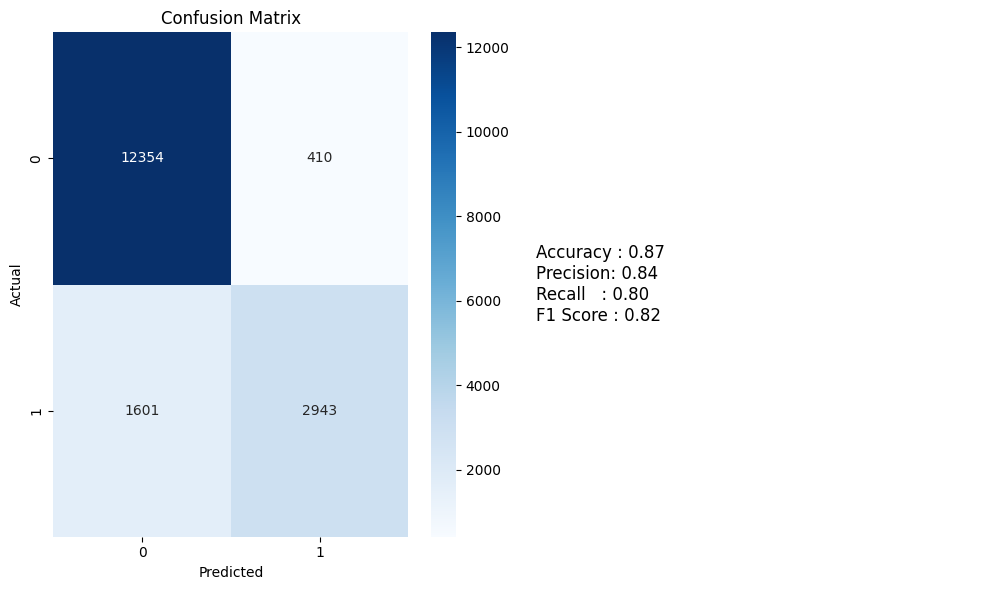

In [18]:
#  Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


metrics_text = (
    f"Accuracy : {accuracy_rf:.2f}\n"
    f"Precision: {precision_rf:.2f}\n"
    f"Recall   : {recall_rf:.2f}\n"
    f"F1 Score : {f1_rf:.2f}"
)

# Plot side-by-side
fig = plt.figure(figsize=(10, 6))
# left: confusion matrix
ax_cm = fig.add_subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", ax=ax_cm, cmap="Blues")
ax_cm.set_title("Confusion Matrix")
ax_cm.set_xlabel("Predicted")
ax_cm.set_ylabel("Actual")

# right: metrics
ax_txt = fig.add_subplot(1, 2, 2)
ax_txt.axis("off")
ax_txt.text(0, 0.5, metrics_text, fontsize=12, va="center")

plt.tight_layout()
plt.show()

